In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_excel("C:/Users/conta/Desktop/Projeto1 DSA/Sample - Superstore.xls") 

In [15]:
filtered_data = data[data['Category'] == 'Office Supplies']

Maior_Venda_Cidade = filtered_data.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()

print(Maior_Venda_Cidade.head(10))

            City      Sales
0  New York City  71361.006
1    Los Angeles  48821.514
2  San Francisco  42253.152
3        Seattle  36038.492
4   Philadelphia  30658.153
5        Detroit  18431.452
6        Houston  16369.564
7    Springfield  13887.152
8        Chicago  13860.224
9       Columbus  13733.424


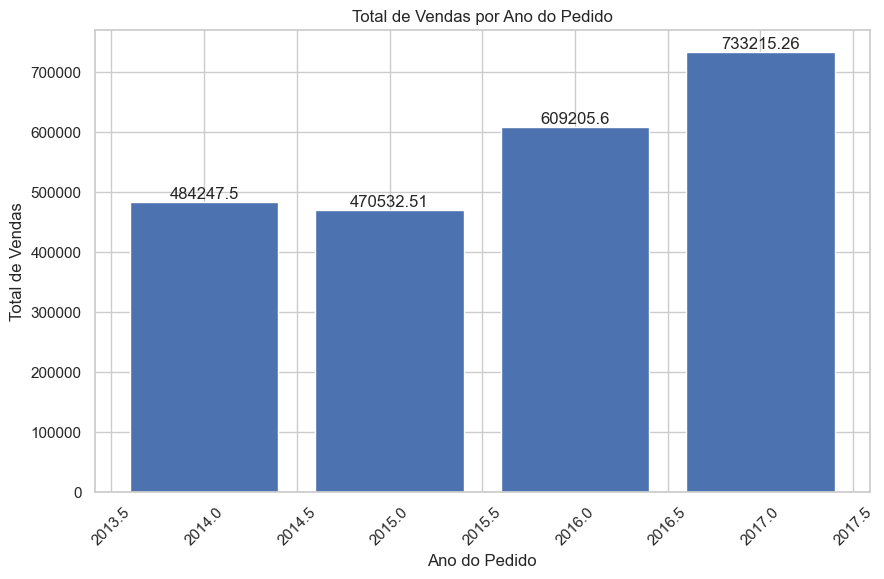

In [16]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

data['Year'] = data['Order Date'].dt.year

vendas_por_ano = data.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(vendas_por_ano['Year'], vendas_por_ano['Sales'])
plt.xlabel('Ano do Pedido')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Ano do Pedido')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

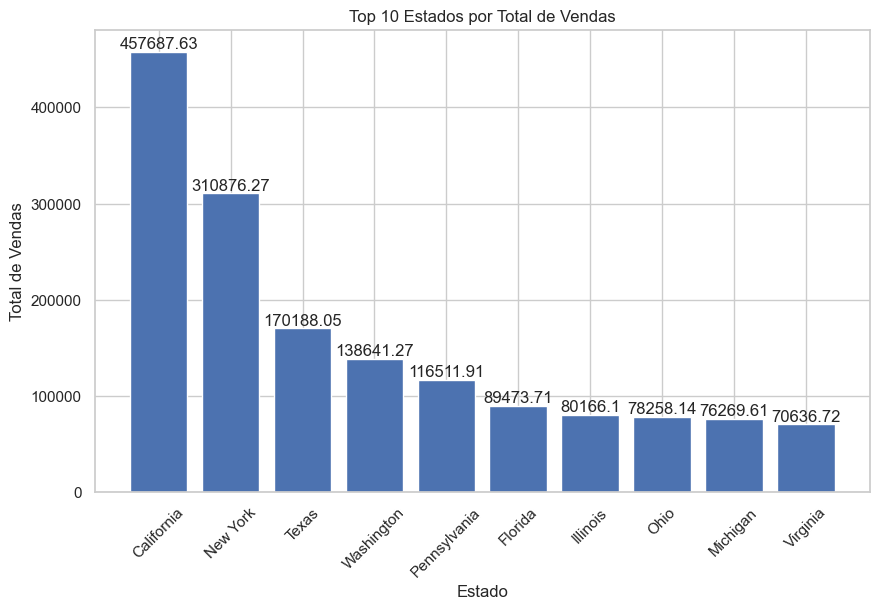

In [17]:
vendas_por_estado = data.groupby('State')['Sales'].sum().reset_index()

top_10_vendas_por_estado = vendas_por_estado.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_vendas_por_estado['State'], top_10_vendas_por_estado['Sales'])
plt.xlabel('Estado')
plt.ylabel('Total de Vendas')
plt.title('Top 10 Estados por Total de Vendas')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

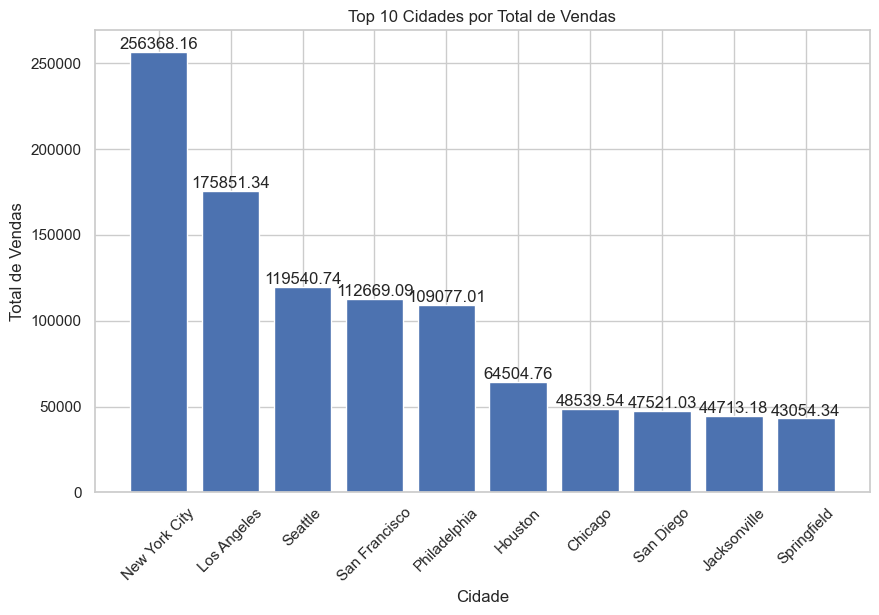

In [18]:
vendas_por_cidade = data.groupby('City')['Sales'].sum().reset_index()

top_10_vendas_por_cidade = vendas_por_cidade.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_vendas_por_cidade['City'], top_10_vendas_por_cidade['Sales'])
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')
plt.title('Top 10 Cidades por Total de Vendas')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

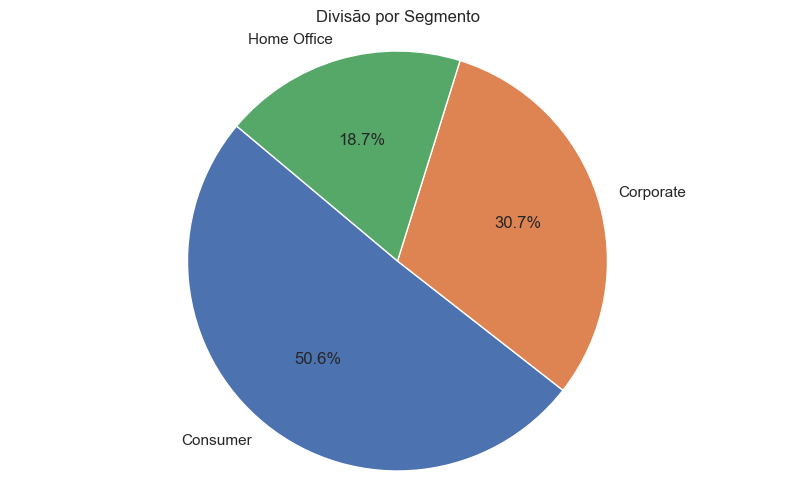

In [19]:
vendas_por_segmento = data.groupby('Segment')['Sales'].sum().reset_index()

pizza_segment = vendas_por_segmento.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(pizza_segment['Sales'], labels=pizza_segment['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Divisão por Segmento')
plt.axis('equal')  

plt.show()

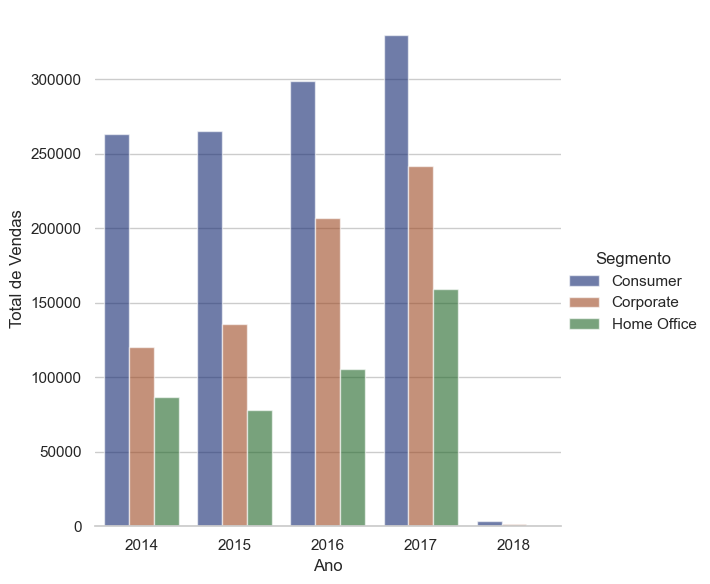

In [20]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Year'] = data['Ship Date'].dt.year

total_seg_e_ano = data.groupby(['Segment', 'Year'])['Sales'].sum().reset_index()

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=total_seg_e_ano, kind="bar",
    x="Year", y="Sales", hue="Segment",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Ano", "Total de Vendas")
g.legend.set_title("Segmento")

In [21]:
desconto = data['Sales'].apply(lambda x: x * 0.15 if x > 1000 else x * 0.10)

total_vendas_sem_desconto = data['Sales'].sum()

total_vendas_com_desconto = (data['Sales'] - desconto).sum()

print(f'O total de vendas sem desconto foi de {total_vendas_sem_desconto:.2f}')
print(f'O total de vendas com desconto foi de {total_vendas_com_desconto:.2f}')

O total de vendas sem desconto foi de 2297200.86
O total de vendas com desconto foi de 2017972.32


<Figure size 1000x800 with 0 Axes>

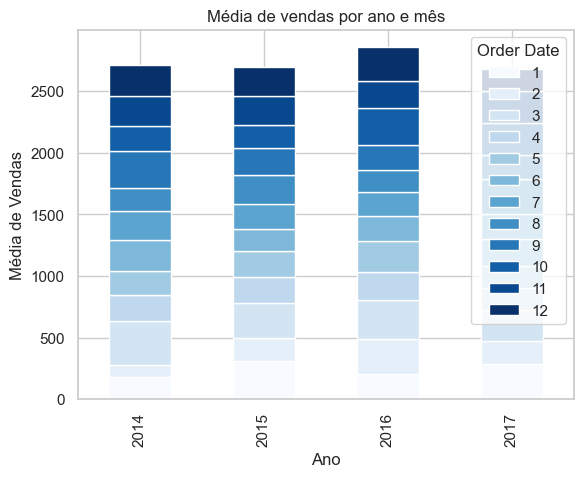

In [22]:
media = data['Sales'].mean()

data['Order Date'] = pd.to_datetime(data['Order Date'])
ano = data['Order Date'].dt.year
mes = data['Order Date'].dt.month

mean_sales = data.groupby([ano, mes])['Sales'].mean().unstack()

plt.figure(figsize=(10, 8))
mean_sales.plot(kind='bar', stacked=True, colormap='Blues')
plt.title('Média de vendas por ano e mês')
plt.xlabel('Ano')
plt.ylabel('Média de Vendas')

plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_16872\2514581859.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_12_vendas = total_vendas_subcat[top_12_indices]


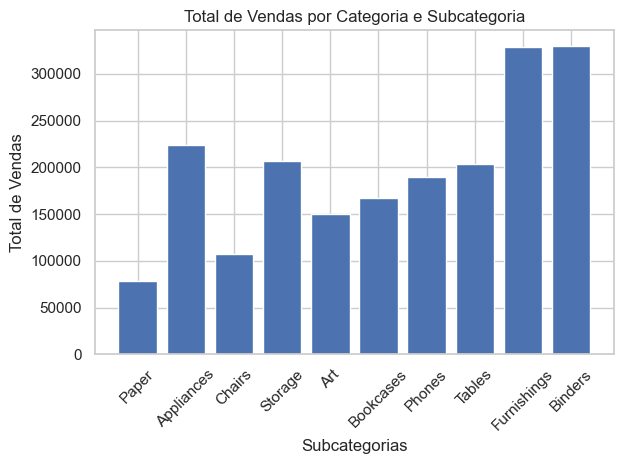

In [23]:
categorias = data['Category']
subcategorias = data['Sub-Category']

total_vendas_subcat = data.groupby('Sub-Category')['Sales'].sum()

top_12_indices = np.argsort(total_vendas_subcat)[-12:]
top_12_vendas = total_vendas_subcat[top_12_indices]
top_12_subcats = [subcategorias[i] for i in top_12_indices]

fig, ax = plt.subplots()
ax.bar(top_12_subcats, top_12_vendas)
ax.set_xlabel('Subcategorias')
ax.set_ylabel('Total de Vendas')
ax.set_title('Total de Vendas por Categoria e Subcategoria')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
'''globals().clear()'''

KeyError: '_oh'